In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
mhealth = pd.read_csv('Mental Health in Tech Survey (Responses) - Form Responses 1.csv')

In [4]:
mhealth.head()

,Timestamp,Age,Gender,Country,"If you live in the United States, which state or territory do you live in?",Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,"If you have a mental health condition, do you feel that it interferes with your work?",How many employees does your company or organization have?,...,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?,Any additional notes or comments
0,8/27/2014 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,8/27/2014 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
mhealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 27 columns):
Timestamp                                                                                                               1260 non-null object
Age                                                                                                                     1260 non-null int64
Gender                                                                                                                  1260 non-null object
Country                                                                                                                 1260 non-null object
If you live in the United States, which state or territory do you live in?                                              744 non-null object
Are you self-employed?                                                                                                  1242 non-null object
Do you have a family history of mental illness?  

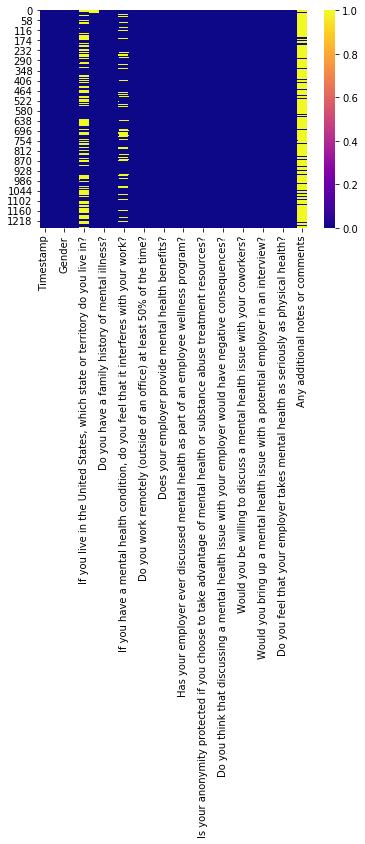

In [79]:
sns.heatmap(mhealth.isnull(),cmap='plasma')

In [6]:
mhealth.drop(['Any additional notes or comments','Timestamp'],axis=1,inplace=True)

In [7]:
mhealth['Do you have a family history of mental illness?'].dropna(axis=0,inplace=True)

In [8]:
# This action would potentially eliminate responses from those that don't suffer from any mental health issues
# Possible bias towards those that do have mental health issues

mhealth['If you have a mental health condition, do you feel that it interferes with your work?'].dropna(axis=0,inplace=True)

In [9]:
#For now, dropping state info and focusing on other factors
mhealth_world = mhealth


In [10]:
mhealth_world.drop('If you live in the United States, which state or territory do you live in?',axis=1,inplace=True)

In [11]:
#Dropping mental health interference column, too many null values to work with for now. Cleaning up data and dropping final null values
mhealth_world.drop('If you have a mental health condition, do you feel that it interferes with your work?',
                   axis=1,inplace=True)

In [12]:
#Dropped null values remaining from Self Employed column since impact will be minimal in EDA. Went from 1260 to 1242 entries from the starting data

mhealth_world = mhealth_world.dropna()
mhealth_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 18 to 1259
Data columns (total 23 columns):
Age                                                                                                                     1242 non-null int64
Gender                                                                                                                  1242 non-null object
Country                                                                                                                 1242 non-null object
Are you self-employed?                                                                                                  1242 non-null object
Do you have a family history of mental illness?                                                                         1242 non-null object
Have you sought treatment for a mental health condition?                                                                1242 non-null object
How many employees does your company or organiz

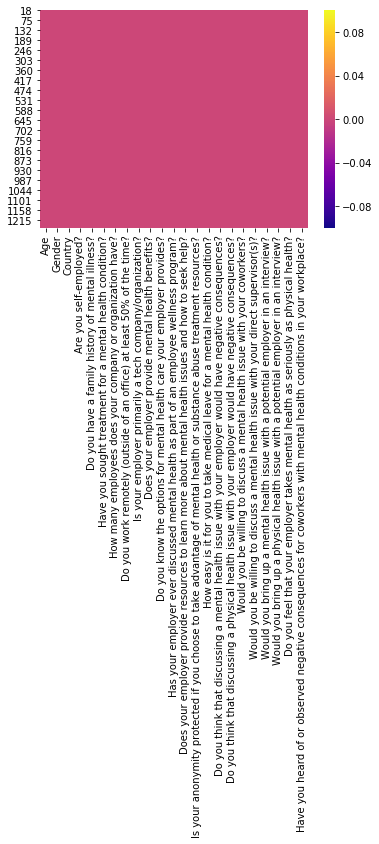

In [13]:
# Quick visualization to show that there are no more null values remaining in data set!

sns.heatmap(mhealth_world.isnull(),cmap='plasma')

In [14]:
#ARGH!!! TROLL ANSWERS!

mhealth_world[(mhealth_world['Age']>100)|(mhealth_world['Age']<=0)]

,Age,Gender,Country,Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,How many employees does your company or organization have?,Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,...,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
143,-29,Male,United States,No,No,No,More than 1000,Yes,No,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
364,329,Male,United States,No,No,Yes,6-25,Yes,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,99999999999,All,Zimbabwe,Yes,Yes,Yes,1-5,No,Yes,No,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes
715,-1726,male,United Kingdom,No,No,Yes,26-100,No,No,No,...,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
1127,-1,p,United States,Yes,Yes,Yes,1-5,Yes,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [16]:
# Make function to search and destroy troll age answers

def age_cleaner(age):
    if age >=0 and age <=100:
        return age
    else:
        return np.nan
    
mhealth_world['Age'] = mhealth_world['Age'].apply(age_cleaner)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
mhealth_world[(mhealth_world['Age']>100)|(mhealth_world['Age']<=0)]

,Age,Gender,Country,Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,How many employees does your company or organization have?,Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,...,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?


In [18]:
# Chances are that this isnt exclusive to age column.....

mhealth_world[(mhealth_world['Gender'] != 'Male') & (mhealth_world['Gender'] !='Female')]

,Age,Gender,Country,Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,How many employees does your company or organization have?,Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,...,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
18,46.0,male,United States,Yes,Yes,No,1-5,Yes,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
21,31.0,male,United States,Yes,No,No,1-5,Yes,Yes,No,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
24,33.0,male,United States,No,Yes,Yes,26-100,No,Yes,Yes,...,Yes,Don't know,No,No,Yes,Yes,No,Yes,Don't know,No
25,35.0,male,United States,No,Yes,Yes,More than 1000,No,No,Yes,...,No,Very easy,Yes,No,Some of them,Yes,No,Yes,No,No
26,33.0,male,United States,No,No,No,1-5,No,Yes,Don't know,...,Don't know,Don't know,Maybe,Maybe,Some of them,No,No,No,Don't know,No
28,34.0,male,United States,No,No,Yes,26-100,Yes,Yes,Don't know,...,Don't know,Somewhat difficult,No,No,Some of them,No,No,No,No,No
32,30.0,male,United Kingdom,No,Yes,Yes,500-1000,Yes,Yes,Don't know,...,Yes,Somewhat easy,Maybe,No,Some of them,Yes,No,Yes,Don't know,No
34,40.0,female,United States,No,No,Yes,1-5,No,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,Maybe,Yes,No
38,50.0,M,United States,No,No,No,100-500,No,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No
39,35.0,M,United States,No,No,Yes,More than 1000,Yes,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,Maybe,Maybe,Yes,No


In [19]:
# Some of these can be fixed, others.....um

def gender_standardizer(gender):
    if gender == 'Female' or gender == 'Male':
        return gender
    if gender != 'Male' or 'Female':
        if gender == 'male' or gender.lower() == 'm' or gender.lower() == 'man' or gender.lower() == 'make' or gender.lower() == 'male ':
            return 'Male'
        if gender == 'female' or gender.lower() == 'f' or gender.lower() == 'woman' or gender.lower() == 'female ':
            return 'Female'
        else:
            return np.nan
    else:
        return np.nan


In [20]:
mhealth_world['Gender'] = mhealth_world['Gender'].apply(gender_standardizer)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
# Lets see if any of the unstandardized responses can be used

mhealth_world[(mhealth_world['Gender'] != 'Male') & (mhealth_world['Gender'] != 'Female')]

,Age,Gender,Country,Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,How many employees does your company or organization have?,Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,...,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
55,27.0,NaN,United States,No,Yes,Yes,26-100,No,Yes,Yes,...,Yes,Don't know,Maybe,No,No,No,No,No,Don't know,No
56,32.0,NaN,United States,No,Yes,No,6-25,Yes,Yes,Don't know,...,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No
72,23.0,NaN,United States,No,No,No,More than 1000,No,Yes,Yes,...,Yes,Somewhat difficult,Maybe,No,Yes,Yes,No,No,No,No
83,27.0,NaN,United States,Yes,No,Yes,1-5,Yes,Yes,Yes,...,Yes,Very easy,Maybe,Maybe,Some of them,Yes,No,Maybe,Yes,No
93,18.0,NaN,Russia,No,No,No,26-100,Yes,Yes,Yes,...,Yes,Somewhat easy,No,No,Yes,Yes,Yes,Yes,Don't know,No
98,33.0,NaN,United States,No,No,Yes,6-25,No,Yes,No,...,Don't know,Somewhat easy,Maybe,No,Some of them,No,No,Maybe,No,No
195,31.0,NaN,Italy,Yes,Yes,No,6-25,No,Yes,No,...,Don't know,Somewhat easy,Maybe,Maybe,Some of them,Some of them,No,Maybe,Don't know,No
219,41.0,NaN,United States,No,No,No,26-100,No,Yes,Yes,...,Don't know,Very easy,Yes,No,No,Some of them,No,No,Don't know,No
306,30.0,NaN,United States,No,Yes,Yes,26-100,No,Yes,Yes,...,Don't know,Somewhat easy,Maybe,No,Some of them,Yes,No,No,Don't know,No
349,25.0,NaN,United States,No,Yes,Yes,More than 1000,No,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Some of them,No,No,Yes,No


In [97]:
# Cleaned up data a bit but unable to work with some entries, so we'll drop for now and include a return nan statement
# in the gender_standardizer function. Dropping null values from data after all the changes to age and gender columns.

mhealth_world = mhealth_world.dropna()
mhealth_world.head()

# only lost about 58 entries out of the 1260 we initially started with, so not bad. With more time we can optimize this


,Age,Gender,Country,Are you self-employed?,Do you have a family history of mental illness?,Have you sought treatment for a mental health condition?,How many employees does your company or organization have?,Do you work remotely (outside of an office) at least 50% of the time?,Is your employer primarily a tech company/organization?,Does your employer provide mental health benefits?,...,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?,How easy is it for you to take medical leave for a mental health condition?,Do you think that discussing a mental health issue with your employer would have negative consequences?,Do you think that discussing a physical health issue with your employer would have negative consequences?,Would you be willing to discuss a mental health issue with your coworkers?,Would you be willing to discuss a mental health issue with your direct supervisor(s)?,Would you bring up a mental health issue with a potential employer in an interview?,Would you bring up a physical health issue with a potential employer in an interview?,Do you feel that your employer takes mental health as seriously as physical health?,Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?
18,46.0,Male,United States,Yes,Yes,No,1-5,Yes,Yes,Yes,...,Yes,Very easy,No,No,Yes,Yes,No,Yes,Yes,Yes
19,36.0,Male,France,Yes,Yes,No,6-25,Yes,Yes,No,...,Yes,Somewhat easy,No,No,Some of them,Some of them,Maybe,Maybe,Don't know,No
20,29.0,Male,United States,No,Yes,Yes,100-500,No,Yes,Yes,...,No,Somewhat difficult,Maybe,No,Some of them,Some of them,No,No,No,No
21,31.0,Male,United States,Yes,No,No,1-5,Yes,Yes,No,...,Yes,Somewhat difficult,No,No,Some of them,Some of them,No,Maybe,Yes,No
22,46.0,Male,United States,No,No,Yes,26-100,Yes,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,Yes,No,Maybe,No,No


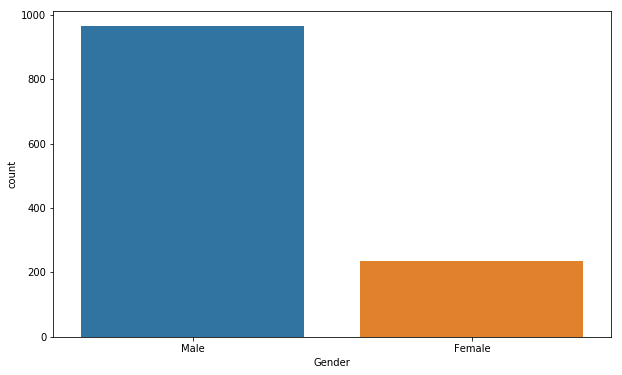

In [23]:
# Now we can finally do some EDA
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=mhealth_world)

# Lots of dudes in tech...

In [26]:
mhealth_world['Country'].value_counts().nlargest(10)
# Top 10 countries participating in the survey

United States     716
United Kingdom    176
Canada             66
Germany            43
Netherlands        27
Ireland            27
Australia          22
France             13
India              10
New Zealand         8
Name: Country, dtype: int64

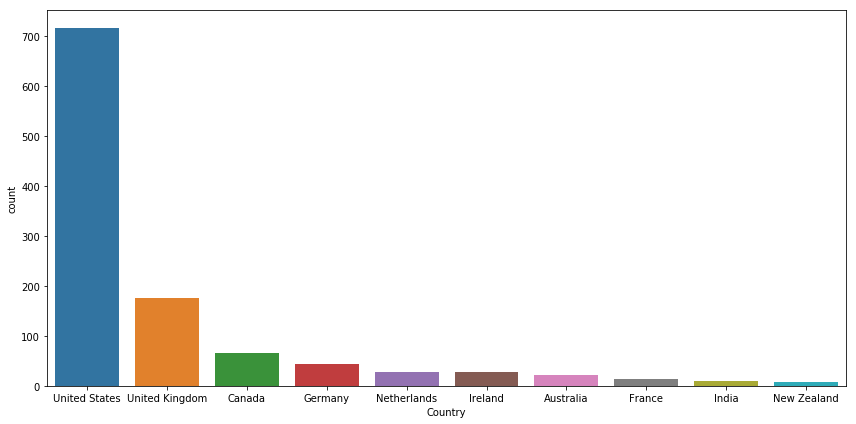

In [94]:
#Showing this in a count plot. Majority of the survey responses are from the US and the UK, most likely due to website being based in US.
top_countries = mhealth_world['Country'].value_counts().iloc[:10]

plt.figure(figsize=(12,6))
sns.countplot(x ='Country', data=mhealth_world,order = top_countries.index) 
plt.tight_layout()

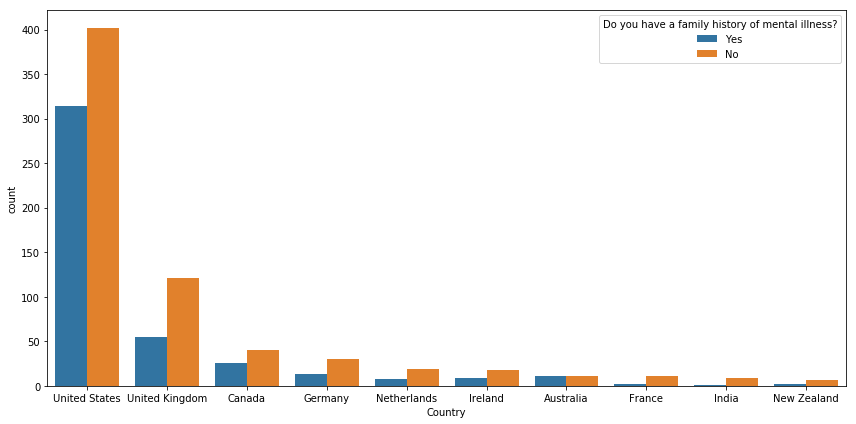

In [95]:
# Now lets take a look at family history for these countries

plt.figure(figsize=(12,6))
sns.countplot(x ='Country',hue = 'Do you have a family history of mental illness?',
              data=mhealth_world,order = top_countries.index) 
plt.tight_layout()

# Looks like mental illness is pretty common in families, but no mental illness in family is more prevalent 

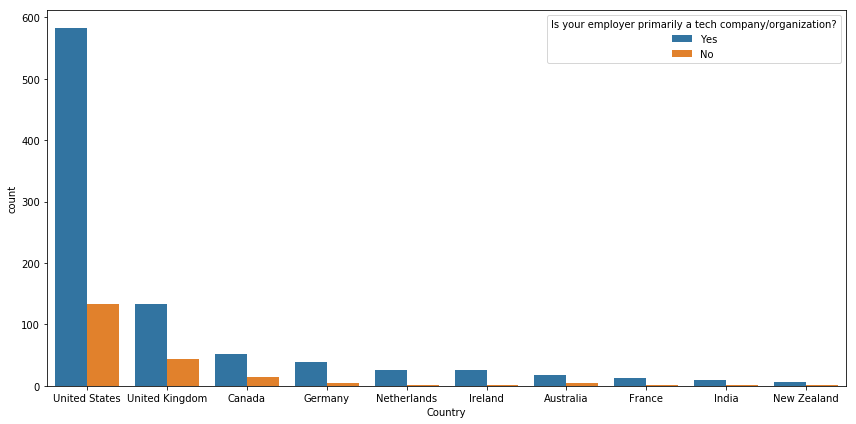

In [96]:
# Now lets look at how many people self-reported that they work in the tech industry
plt.figure(figsize=(12,6))
sns.countplot(x ='Country',hue = 'Is your employer primarily a tech company/organization?',
              data=mhealth_world,order = top_countries.index) 
plt.tight_layout()

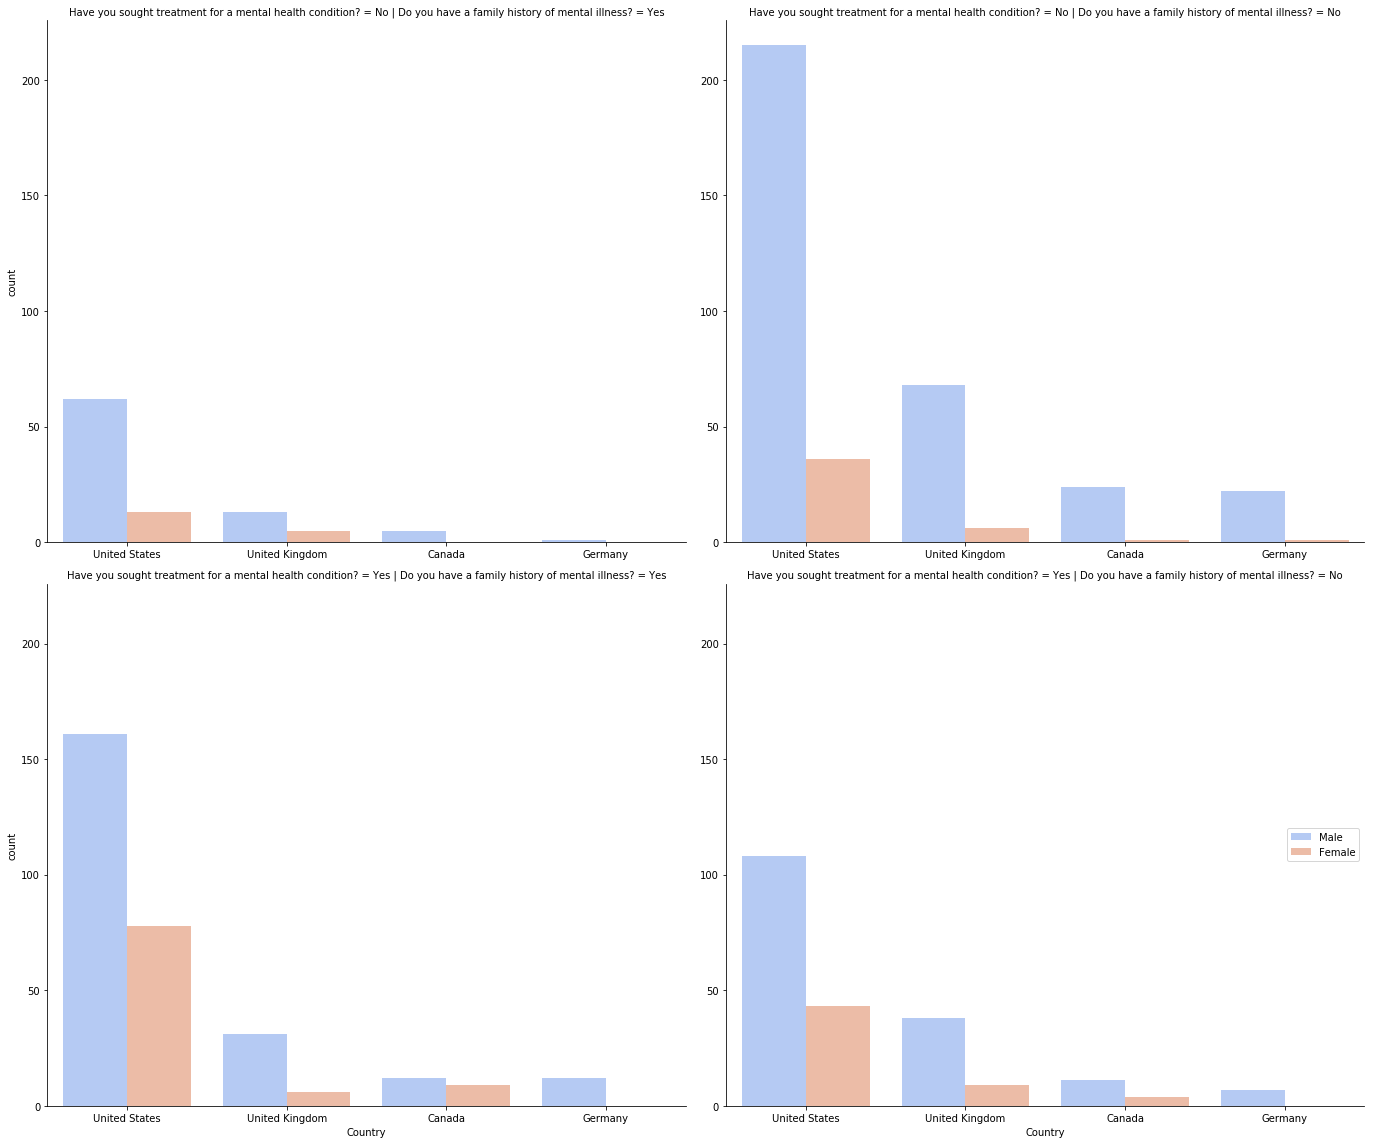

In [154]:
#Lets do some EDA on top 4 countries in survey based on several factors:

top_countries4 = mhealth_world['Country'].value_counts().iloc[:4]

g = sns.factorplot(x ='Country',hue = 'Gender',
                   col='Do you have a family history of mental illness?',
                   row = 'Have you sought treatment for a mental health condition?',
                   data=mhealth_world,order = top_countries4.index, kind="count",size=8, aspect=1.2,legend=False,
                   palette = 'coolwarm')
plt.tight_layout()
plt.legend(loc='center right')

In [ ]:
# Again, we can see the influence men have on the survey since there are so many more of them than women.
# 